# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)

#### Grupo:
  - Ranulfo Mascari Neto
  - Heitor Rodrigues Sabino

*Gerando um grafo não-direcionado conexo*

In [1]:
!pip install gurobipy

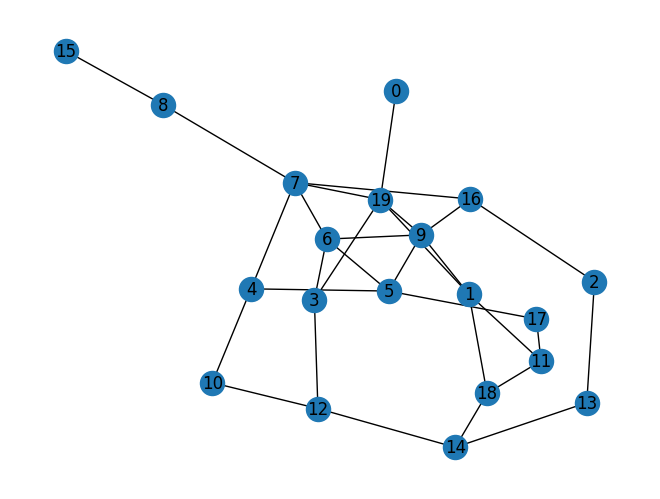

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if(m < n - 1 or m > n * (n - 1) // 2):
      return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()


### Modelagem Matemática

#### Parâmetros
- $G = (V, A)$: grafo não-direcionado e conexo;
  - $V$: Conjunto de vértices do grafo;
  - $A$: Conjunto de arestas do grafo.

#### Variáveis de Decisão
- $x_v \in \{0, 1\}$: variável binária associada a cada vértice $v \in V$, onde:
  - $x_v = 1$ se o vértice $v$ está no conjunto $V_1$;
  - $x_v = 0$ se o vértice $v$ está no conjunto $V_2$.

- $y_{uv} \in \{0, 1\}$: variável binária associada a cada aresta $(u, v) \in A$, onde:
  - $y_{uv} = 1$ se os vértices $u$ e $v$ pertencem a subconjuntos diferentes;
  - $y_{uv} = 0$ caso contrário.

#### Função Objetivo
Maximizar o número de arestas entre os conjuntos $V_1$ e $V_2$:
$$\max \sum_{(u, v) \in A} y_{uv}$$


In [3]:
import gurobipy as gp
from gurobipy import GRB

# Criação do modelo
def maximiza_arestas_entre_subconjuntos(grafo):
    modelo = gp.Model("Maximizar Arestas Entre Subconjuntos")

    # Conjuntos de vértices e arestas
    V = list(grafo.nodes)
    A = list(grafo.edges)

    # Variáveis de decisão
    x = modelo.addVars(V, vtype=GRB.BINARY, name="x")
    y = modelo.addVars(A, vtype=GRB.BINARY, name="y")

    # Função objetivo: maximizar arestas entre os subconjuntos
    modelo.setObjective(gp.quicksum(y[u, v] for u, v in A), GRB.MAXIMIZE)

    # Restrições
    for u, v in A:
        modelo.addConstr(y[u, v] <= x[u] + x[v], name=f"y_{u}_{v}_1")
        modelo.addConstr(y[u, v] <= 2 - (x[u] + x[v]), name=f"y_{u}_{v}_2")

    # Resolver o modelo
    modelo.optimize()

    # Verificar a solução
    if modelo.status == GRB.OPTIMAL:
        print("Solução ótima encontrada:")
        print("Conjunto V1:")
        V1 = [v for v in V if x[v].x > 0.5]
        print(V1)
        print("Conjunto V2:")
        V2 = [v for v in V if x[v].x <= 0.5]
        print(V2)
        print("Arestas entre V1 e V2:")
        arestas = [(u, v) for u, v in A if y[u, v].x > 0.5]
        print(arestas)
    else:
        print("Solução não encontrada.")

In [4]:
maximiza_arestas_entre_subconjuntos(grafo)

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 60 rows, 50 columns and 180 nonzeros
Model fingerprint: 0x4ed7c2ef
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 14 rows and 14 columns
Presolve time: 0.00s
Presolved: 46 rows, 36 columns, 138 nonzeros
Found heuristic solution: objective 7.0000000
Variable types: 0 continuous, 36 integer (33 binary)
Found heuristic solution: objective 9.0000000

Root relaxation: objective 3.000000e+01, 15 iterations, 0.00 seconds (0.00 work units)

    No